<a href="https://colab.research.google.com/github/zxzhaixiang/MachineLearning_demo/blob/master/QRI_GoogleColab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quick Machine Learning Demo

## Import all necessary libraries

In [0]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
import pandas as pd
import seaborn as sns
from seaborn.linearmodels import corrplot
from sklearn.metrics import explained_variance_score, r2_score, mean_absolute_error, mean_squared_error


In [2]:
!pip install shap

In [0]:
import shap

In [4]:
shap.initjs()

## Load Raw Data

In [0]:
boston = load_boston()

In [6]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
#convert data into a panda dataframe
bos_df = pd.DataFrame(boston.data, columns = boston.feature_names)
bos_df['PRICE'] = boston.target

In [8]:
#Take a quick peep into the data
bos_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [9]:
bos_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


/usr/local/lib/python3.6/dist-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/usr/local/lib/python3.6/dist-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


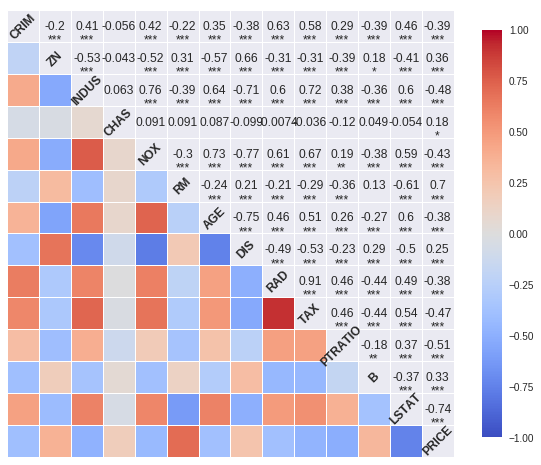

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
corrplot(bos_df)

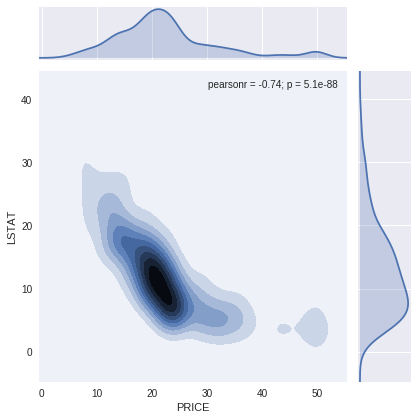

In [11]:
sns.jointplot(bos_df['PRICE'], bos_df['LSTAT'], kind='kde')

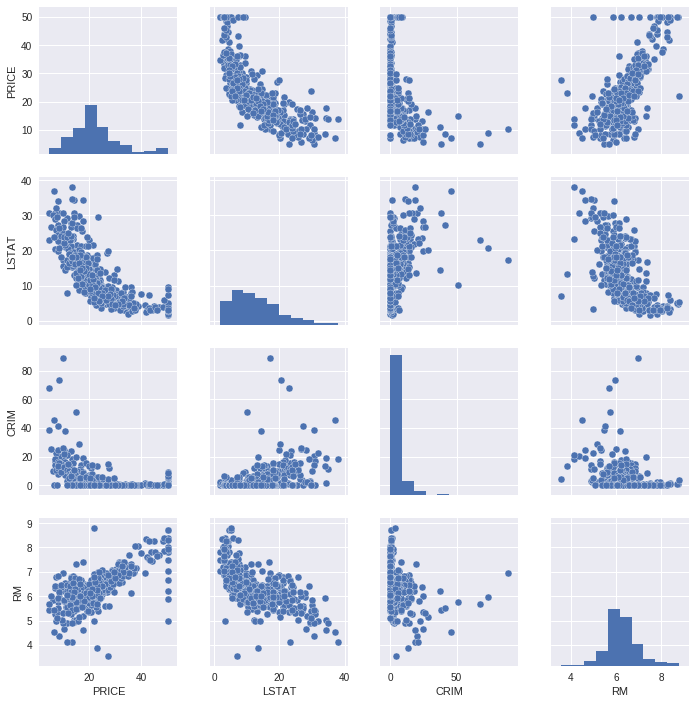

In [12]:
sns.pairplot(bos_df.loc[:,['PRICE','LSTAT','CRIM','RM']])

## Prepare Dataset

In [0]:
X = bos_df.drop('PRICE', axis = 1)
Y = bos_df['PRICE']


In [14]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


## Traing Model

In [0]:
# Build a simple Random Forest Regressor
reg = RandomForestRegressor(max_depth=5, random_state=42)

In [16]:
reg.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [0]:
Y_train_pred, Y_test_pred = reg.predict(X_train), reg.predict(X_test)

(Text(0.5, 0, 'True Price (test)'), Text(0, 0.5, 'Predicted Price (test)'))

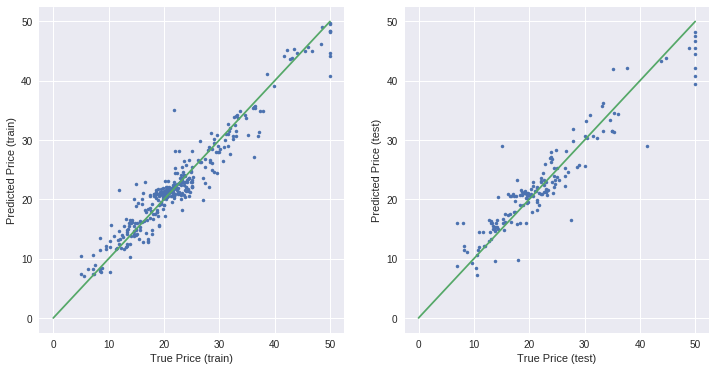

In [18]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(Y_train, Y_train_pred,'.')
plt.plot([0,50],[0,50])
plt.xlabel('True Price (train)'), plt.ylabel('Predicted Price (train)')

plt.subplot(122)
plt.plot(Y_test, Y_test_pred,'.')
plt.plot([0,50],[0,50])
plt.xlabel('True Price (test)'), plt.ylabel('Predicted Price (test)')


In [0]:
evl_df = pd.DataFrame(
  [[explained_variance_score(Y_train, Y_train_pred), r2_score(Y_train, Y_train_pred), mean_absolute_error(Y_train, Y_train_pred), mean_squared_error(Y_train, Y_train_pred)],
   [explained_variance_score(Y_test, Y_test_pred), r2_score(Y_test, Y_test_pred), mean_absolute_error(Y_test, Y_test_pred), mean_squared_error(Y_test, Y_test_pred)]],
   columns = ['explained_variance','r2','MAE','MSE'],
    index = ['train','test'])
 


In [20]:
evl_df

,explained_variance,r2,MAE,MSE
train,0.923554,0.923554,1.783157,6.102399
test,0.882810,0.882342,2.413299,11.029758


## Model Explanation

In [0]:
# model explainer
explainer = shap.TreeExplainer(reg)

In [0]:
shap_values = explainer.shap_values(X_train)

In [0]:
shap_df = pd.DataFrame(shap_values, columns = boston.feature_names)
shap_df['RelPRICE'] = shap_df.sum(axis=1)

<Figure size 1440x1440 with 0 Axes>

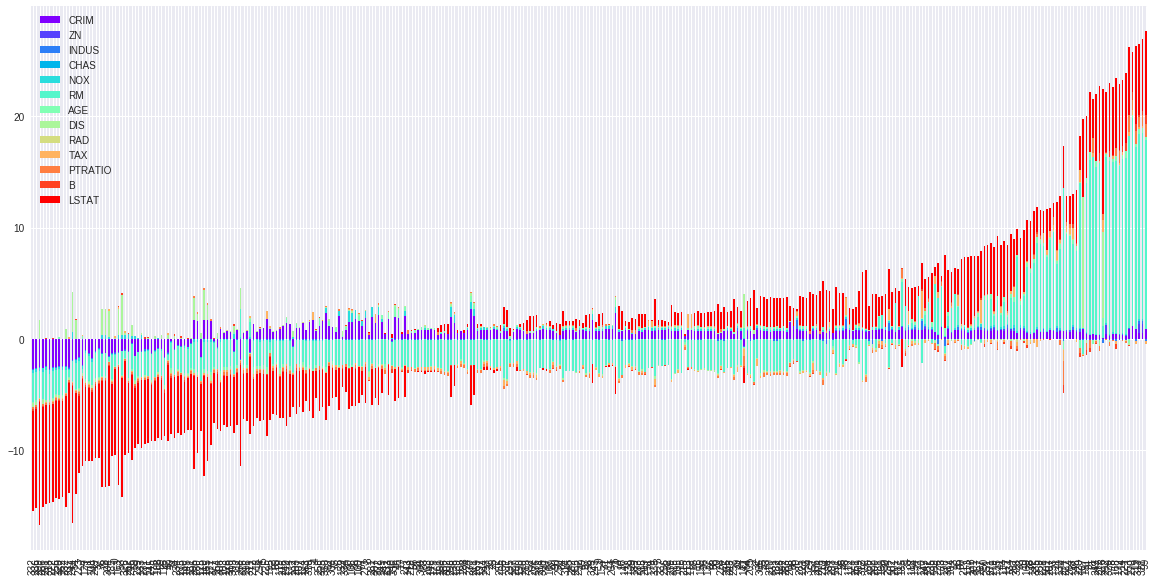

In [24]:
plt.figure(figsize=(20,20))
shap_df.sort_values(by='RelPRICE').drop(columns = 'RelPRICE').plot(kind='bar', stacked = True, figsize=(20,10), cmap='rainbow')

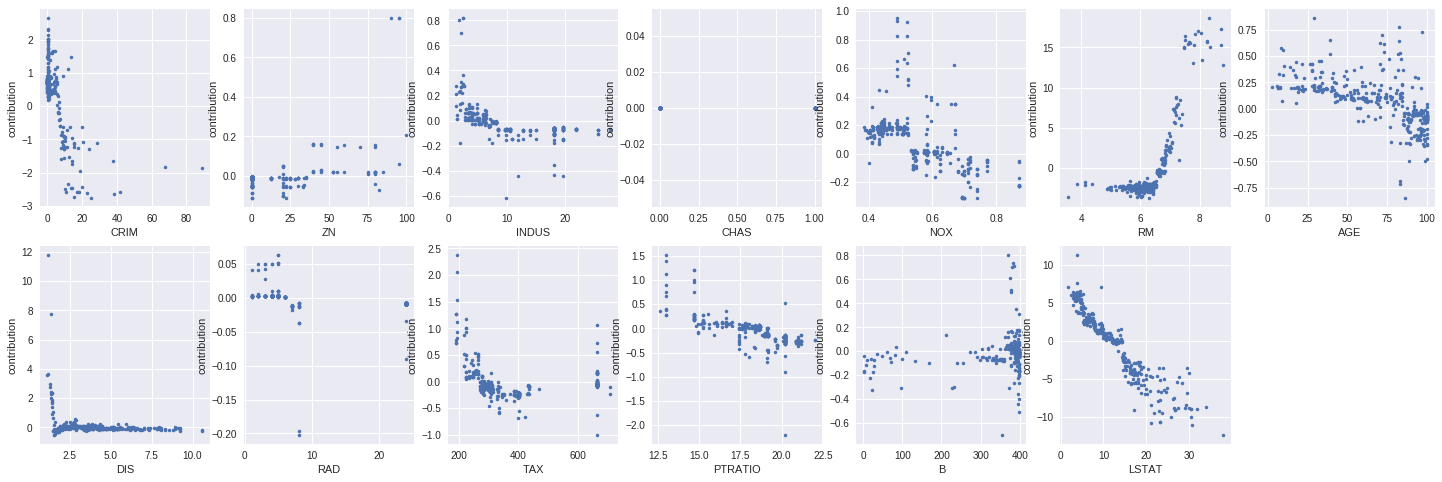

In [25]:
plt.figure(figsize=(25,8))
for i, col in enumerate(list(X_train)):
  plt.subplot(2,7,i+1)
  plt.plot(X_train[col],shap_df[col], '.')
  plt.xlabel(col), plt.ylabel('contribution')